# Funciones de distribución de probabilidades

## Distribución uniforme

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100483.,  99989., 100192., 100173.,  99765.,  99754.,  98985.,
        100410., 100176., 100073.]),
 array([ 1.00003561, 10.90002083, 20.80000606, 30.69999128, 40.59997651,
        50.49996173, 60.39994696, 70.29993218, 80.19991741, 90.09990263,
        99.99988786]),
 <BarContainer object of 10 artists>)

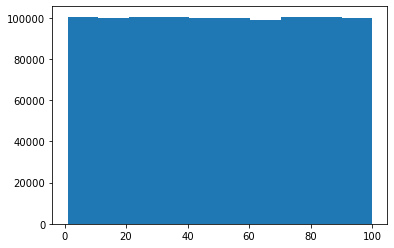

In [14]:
%matplotlib inline
plt.hist(data)

## Distribución normal

In [20]:
data2 = np.random.randn(1000)

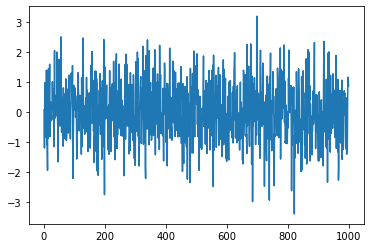

In [21]:
x = range(1,1001)
y = data2
plt.plot(x,y)

(array([  4.,  12.,  41., 160., 239., 257., 178.,  74.,  34.,   1.]),
 array([-3.4027511 , -2.74223799, -2.08172487, -1.42121176, -0.76069864,
        -0.10018553,  0.56032758,  1.2208407 ,  1.88135381,  2.54186693,
         3.20238004]),
 <BarContainer object of 10 artists>)

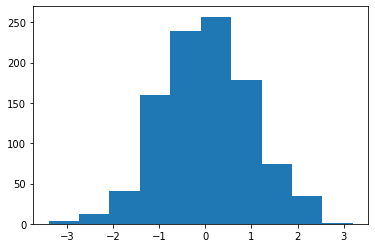

In [22]:
plt.hist(data2)

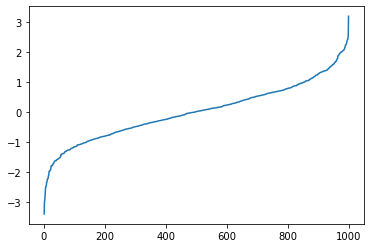

In [24]:
plt.plot(x,sorted(data2))

(array([  22.,  109.,  571., 1630., 2801., 2657., 1539.,  532.,  127.,
          12.]),
 array([-3.86516412, -1.98511925, -0.10507437,  1.77497051,  3.65501538,
         5.53506026,  7.41510513,  9.29515001, 11.17519488, 13.05523976,
        14.93528464]),
 <BarContainer object of 10 artists>)

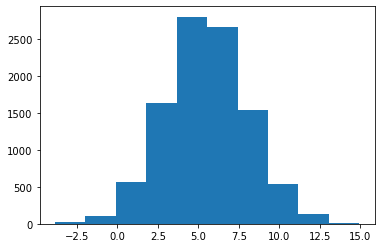

In [27]:
# mu = media
# sd = desviación típica
# Z = normal estándar
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)

data3 = mu+sd*Z # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data3)

In [28]:
# np.random.randn(arrays,elementos)
data4 = np.random.randn(2,4)
data4 

array([[-0.87658506,  0.08913133, -1.36700686, -1.45294997],
       [ 0.15545433,  0.21521788,  1.17814019,  0.39905487]])

In [29]:
# np.random.randn(elementos)
data5 = np.random.randn(2)
data5

array([0.80762394, 0.58030327])

In [31]:
# np.random.randn() = 1 solo elemento
data6 = np.random.randn()
data6 

-0.605157313253744

## La simulación de Monte Carlo

* Generamos dos números aleatorios (x e y )entre 0 y 1 en total 1000 veces
* Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> Estamos dentro del círculo
    * Si el valor es superior a 1 -> Estamos fuera del circulo
* Calculamos el número total de veces que están dentro del circulo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer bien.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por ejemplo, 100), para obtener (100) diferentes aproximaciones de pi.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [49]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1406400000000003


(3.1406400000000003, [<matplotlib.lines.Line2D at 0x16c6d4e2760>])

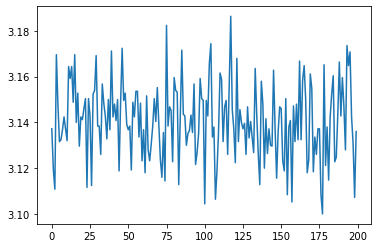

In [50]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [54]:
n =1000000
data = pd.DataFrame(
    {
        "A" : np.random.randn(n),
        "B" : 1.5 + 2.5 * np.random.randn(n),
        "C" : np.random.uniform(5, 32, n)
    }
)

In [57]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000056,1.500860,18.496939
std,1.000238,2.499550,7.800609
min,-4.782625,-10.151293,5.000023
25%,-0.673974,-0.184717,11.734512
50%,-0.000191,1.501888,18.499425
75%,0.674536,3.189348,25.246318
max,4.766901,13.611313,31.999976


(array([7.20000e+01, 2.05900e+03, 2.54810e+04, 1.40155e+05, 3.29165e+05,
        3.31249e+05, 1.43380e+05, 2.63370e+04, 2.03400e+03, 6.80000e+01]),
 array([-4.78262497, -3.82767233, -2.8727197 , -1.91776706, -0.96281442,
        -0.00786178,  0.94709086,  1.90204349,  2.85699613,  3.81194877,
         4.76690141]),
 <BarContainer object of 10 artists>)

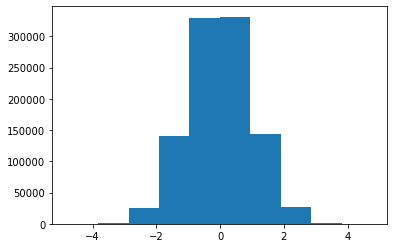

In [58]:
plt.hist(data["A"])

(array([1.02000e+02, 2.81000e+03, 3.23950e+04, 1.59874e+05, 3.41193e+05,
        3.14918e+05, 1.25762e+05, 2.13490e+04, 1.53500e+03, 6.20000e+01]),
 array([-10.15129337,  -7.77503276,  -5.39877214,  -3.02251152,
         -0.6462509 ,   1.73000972,   4.10627033,   6.48253095,
          8.85879157,  11.23505219,  13.6113128 ]),
 <BarContainer object of 10 artists>)

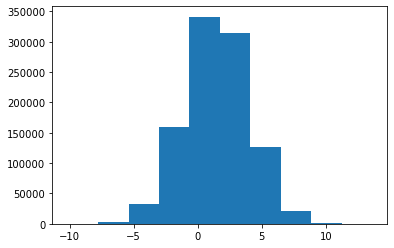

In [59]:
plt.hist(data["B"])

(array([100371., 100446.,  99773.,  99545.,  99896.,  99611., 100235.,
         99905., 100221.,  99997.]),
 array([ 5.00002347,  7.7000187 , 10.40001393, 13.10000917, 15.8000044 ,
        18.49999963, 21.19999487, 23.8999901 , 26.59998533, 29.29998057,
        31.9999758 ]),
 <BarContainer object of 10 artists>)

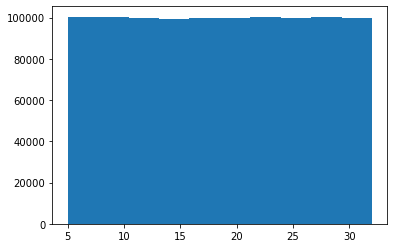

In [60]:
plt.hist(data["C"])

In [61]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [62]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [63]:
column_names = data.columns.values.tolist()

In [65]:
a = len(column_names)
a

21

In [70]:
new_data = pd.DataFrame(
    {
        "Column Name" : column_names,
        "A" : np.random.randn(a),
        "B" : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [71]:
new_data

,Column Name,A,B
42,State,-1.302690,0.275799
43,Account Length,-0.007695,0.479296
44,Area Code,-0.843968,0.773369
45,Phone,-1.250623,0.046421
46,Int'l Plan,1.403630,0.248157
47,VMail Plan,0.436392,0.002773
48,VMail Message,1.441179,0.394971
49,Day Mins,-0.156196,0.335112
50,Day Calls,-0.267402,0.061416
51,Day Charge,-1.246841,0.398462
